In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import random
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import exists, expanduser
import sys

from cx_analysis.skeleton_morphology import run_morphology_analysis, strahler_order
from cx_analysis.connectome import Connectome
from cx_analysis.utils import load_preprocessed_connectome, yymmdd_today
from cx_analysis.node_ops import segment_skeleton, find_end_points, find_central_segment, measure_path_lengths, measure_seg_distances
from cx_analysis.vis.fig_tools import subtype_cm

plt.rcdefaults()
plt.style.use('vis/lamina.mplstyle') # may not work if installed as a module

OSError: 'vis/lamina.mplstyle' not found in the style library and input is not a valid URL or path; see `style.available` for list of available styles

In [4]:
tp = '210511'
C = load_preprocessed_connectome(f"~/Data/{tp}_lamina/")

Pickle loaded from: /mnt/home/nchua/Data/210511_lamina/210511_preprocessed.pickle


In [5]:
results_file = expanduser(f'~/Data/{tp}_lamina/210419_lmc-morphology.json')
subtypes = ['LMC_1', 'LMC_2', 'LMC_3', 'LMC_4', 'LMC_N']#, 'LMC_3', 'LMC_4']#, 'LMC_N']#, 'R7', 'R8', 'R7p']
these_skels = [s for s, data in C.skel_data.items() if data.subtype in subtypes]

if exists(results_file):
    with open(results_file, 'r') as fh:
        d = json.load(fh)
        segments, central_segs, seg_lens, seg_dists, strahler = d['segments'], d['central_segs'], d['seg_lengths'], d['seg_distances'], d['strahler']
else:
    segments, central_segs, seg_lens, seg_dists, strahler = run_morphology_analysis(C, 
                                                                                    these_skels, 
                                                                                    restrict_tags='lamina_end', 
                                                                                    save_file=results_file, 
                                                                                    verbose=False)

#segments, central_segs, seg_lens, seg_dists, strahler = d['segments'], d['central_segs'], d['seg_lengths'], d['seg_distances'], d['strahler']

In [6]:
summary_data = []
for skel_id in these_skels:
    data = C.skel_data[skel_id]
    summary_data.append({'name': data.name,
                         'skel_id': data.skel_id,
                         'om': data.group,
                         'subtype': data.subtype,
                         'n_central_nodes': len(central_segs[skel_id]), 
                         'n_nodes': len(data.skel_nodes) - len(data.r_nodes), 
                         'n_segments': len(segments[skel_id])})
summary_data = pd.DataFrame(summary_data).set_index('skel_id')

In [1]:
### TESTING ###
# 1. visualize random sample of central segments
fig, ax = plt.subplots(2, 2, figsize=[8, 8])
skel_sample = random.sample(list(central_segs.keys()), 100)

for s, central in central_segs.items():
    if s not in skel_sample:
        continue
    coord_map = {data[0]: data[3:6] for data in C.skel_data[s].skel_nodes}
    x, y, z = np.array([coord_map[n] for n in central]).T

    ax[0,0].plot(x, y, c='k')
    ax[0,1].plot(z, y)
    ax[1,0].plot(x, z)
ax[0, 0].axis('off')
ax[0, 1].axis('off')
ax[1, 0].axis('off')
ax[1, 1].remove()

plt.show()

NameError: name 'plt' is not defined

loose end: 13063, A3_L3

312774
omC2_L2_nc


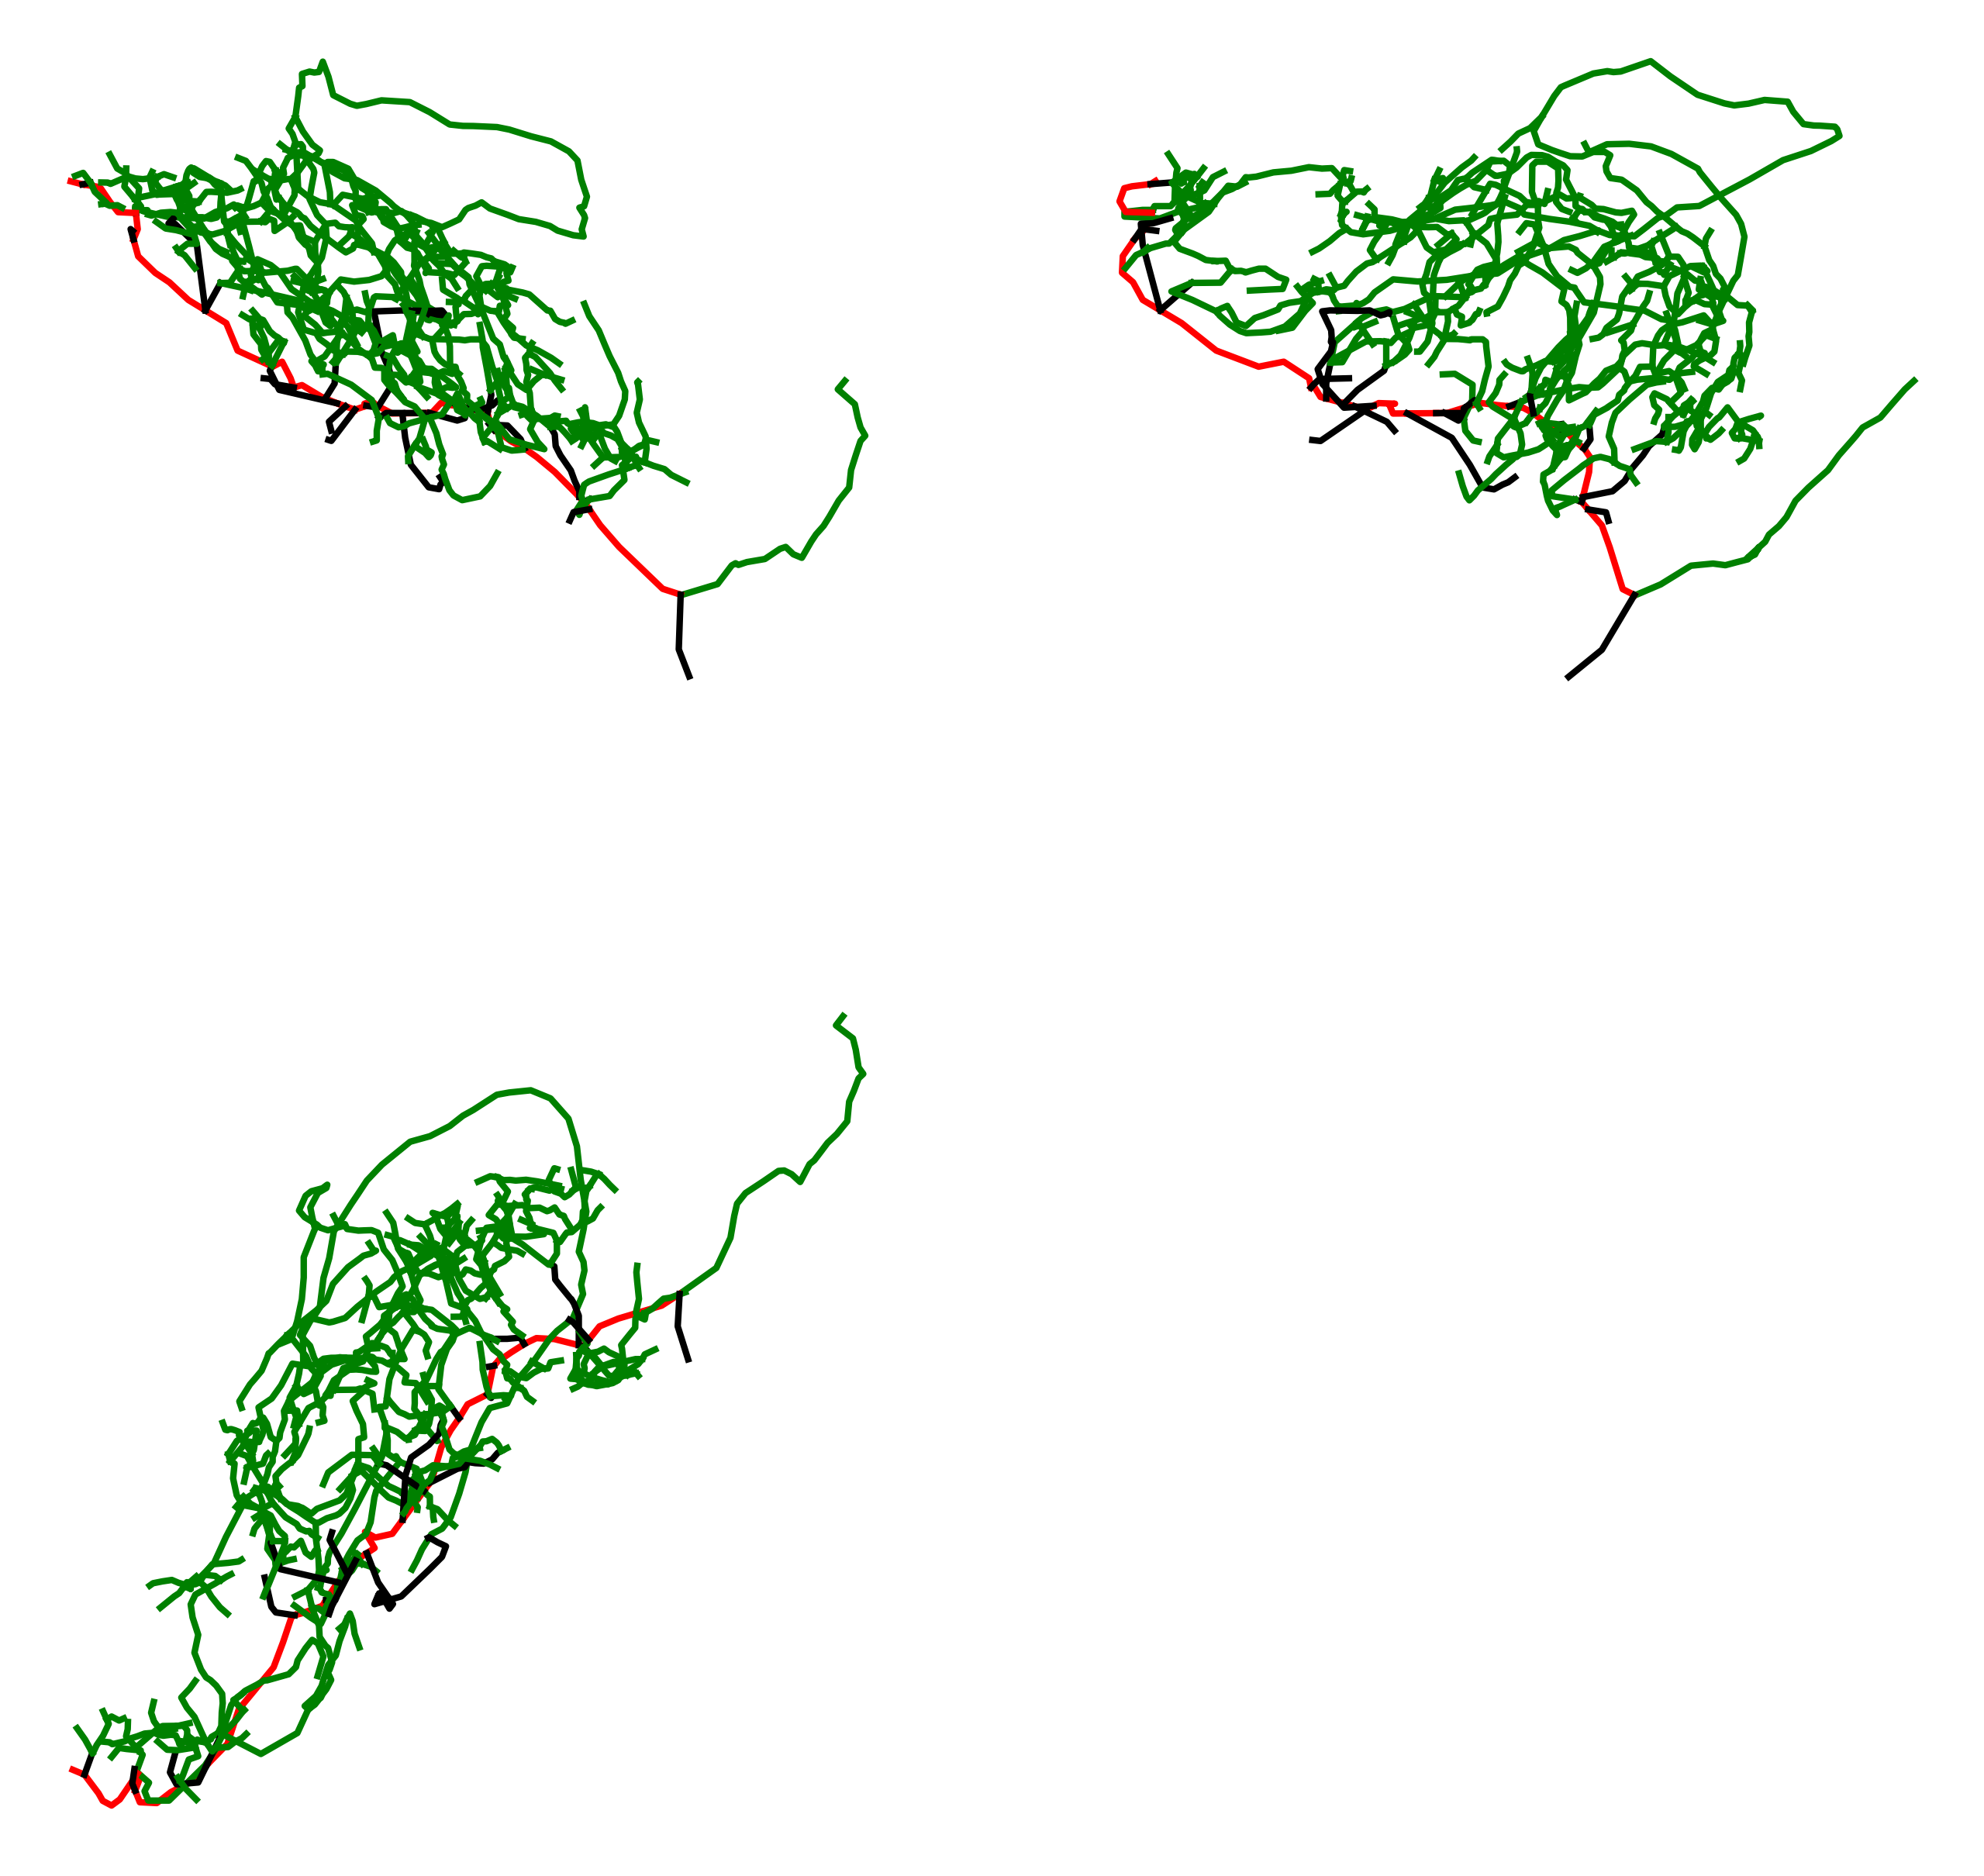

In [13]:
# 2. Visualize a random neurite's central segs vs their branches
fig, ax = plt.subplots(2, 2, figsize=[8, 8])
skel_sample = '312774'

for s, central in central_segs.items():
    #print(central)
    if s not in skel_sample:
        continue
        
    print(s)
    print(C.skel_data[s].name)
    coord_map = {data[0]: data[3:6] for data in C.skel_data[s].skel_nodes}
    for b, seg in segments[s].items():
        #print(b)
        x, y, z = np.array([coord_map[n] for n in seg]).T
        if (int(b) in central):
            ax[0,0].plot(x, y, c='r')
            ax[0,1].plot(z, y, c='r')
            ax[1,0].plot(x, z, c='r')
        elif (int(seg[0]) in central):
            ax[0,0].plot(x, y, c='k')
            ax[0,1].plot(z, y, c='k')
            ax[1,0].plot(x, z, c='k')
        else:
            ax[0,0].plot(x, y, c='g')
            ax[0,1].plot(z, y, c='g')
            ax[1,0].plot(x, z, c='g')
    
#ax[0,0].set_title(C.skel_data[skel_sample[0]].name)
ax[0, 0].axis('off')
ax[0, 1].axis('off')
ax[1, 0].axis('off')
ax[1, 1].remove()
ax[0, 0].set_aspect(1)
ax[0, 1].set_aspect(1)
ax[1, 0].set_aspect(1)

plt.show()

156252
omE4_L2


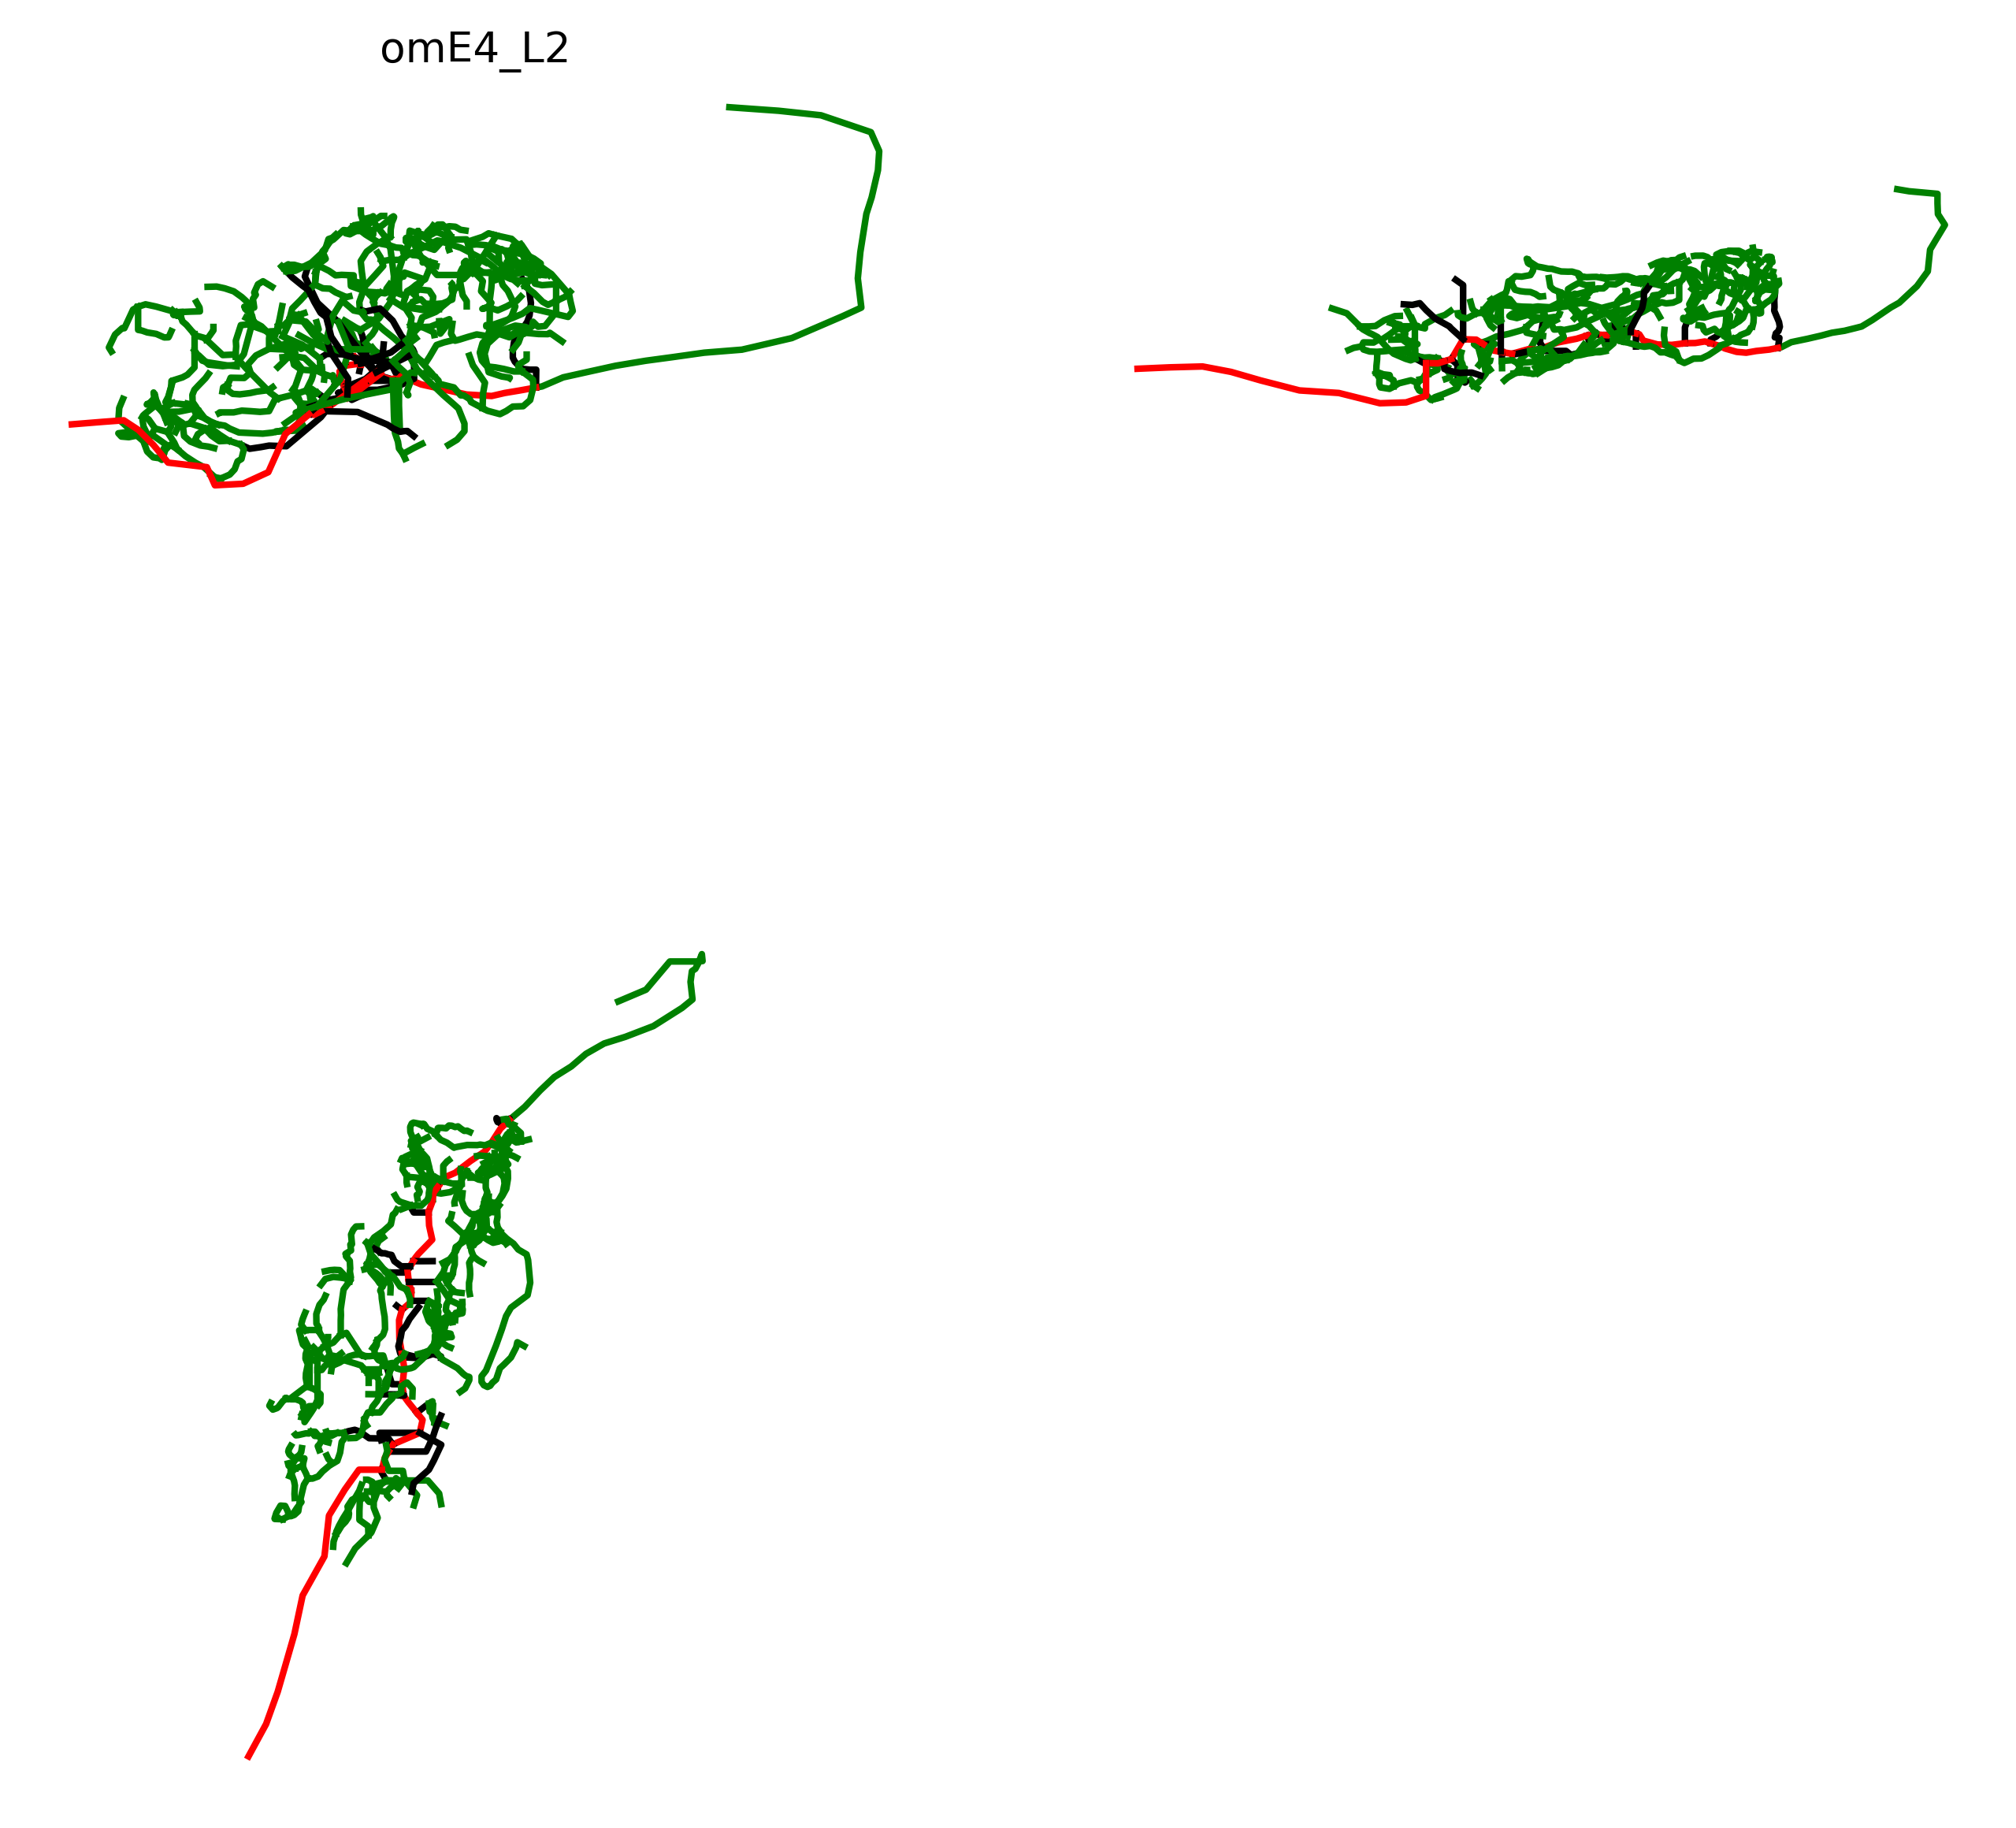

In [12]:
# 2. Visualize a random neurite's central segs vs their branches
fig, ax = plt.subplots(2, 2, figsize=[8, 8])
skel_sample = random.sample(list(central_segs.keys()), 1)

for s, central in central_segs.items():
    #print(central)
    if s not in skel_sample:
        continue
        
    print(s)
    print(C.skel_data[s].name)
    coord_map = {data[0]: data[3:6] for data in C.skel_data[s].skel_nodes}
    for b, seg in segments[s].items():
        #print(b)
        x, y, z = np.array([coord_map[n] for n in seg]).T
        if (int(b) in central):
            ax[0,0].plot(x, y, c='r')
            ax[0,1].plot(z, y, c='r')
            ax[1,0].plot(x, z, c='r')
        elif (int(seg[0]) in central):
            ax[0,0].plot(x, y, c='k')
            ax[0,1].plot(z, y, c='k')
            ax[1,0].plot(x, z, c='k')
        else:
            ax[0,0].plot(x, y, c='g')
            ax[0,1].plot(z, y, c='g')
            ax[1,0].plot(x, z, c='g')
    
ax[0,0].set_title(C.skel_data[skel_sample[0]].name)
ax[0, 0].axis('off')
ax[0, 1].axis('off')
ax[1, 0].axis('off')
ax[1, 1].remove()
ax[0, 0].set_aspect(1)
ax[0, 1].set_aspect(1)
ax[1, 0].set_aspect(1)

plt.show()

Histograms of path length and seg distance

In [10]:
pd.DataFrame(summary_data)